In [1]:
from __future__ import division
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline  


In [2]:
#Reading the training data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [3]:
#function to get last names of passengers 
def GetLastName(FullName):
    L = []
    for i in range(0,len(FullName)):
        temp = FullName[i].split(',')
        L += [temp[0]]
    return L

In [4]:
#replacing names with last names (since this may or may not have some significance)

L = GetLastName(train_df['Name'])
train_df['Name'] = L 

L2 = GetLastName(test_df['Name'])
test_df['Name'] = L2 

In [5]:
#checking which features have Null elements 
sum(pd.isnull(test_df['Embarked']))

0

In [6]:
#create function to impute missing age values. I'm taking median of age for the passengers in the same class
def RetAgeAdjusted(DF):
    I = pd.isnull(DF['Age'])
    I2 = (DF['Pclass']==1)*(np.isnan(DF['Age'])!=True)
    m1 = np.median(DF['Age'][I2])
    
    I2 = (DF['Pclass']==2)*(np.isnan(DF['Age'])!=True)
    m2 = np.median(DF['Age'][I2])

    I2 = (DF['Pclass']==3)*(np.isnan(DF['Age'])!=True)
    m3 = np.median(DF['Age'][I2])

    print m1 
    print m2 
    print m3
    
    for i in range(0,len(I)):
        if I[i]==True:
            if DF['Pclass'][i]==1:
                DF['Age'][i] = m1
            elif DF['Pclass'][i]==2:
                DF['Age'][i] = m2
            else:
                DF['Age'][i] = m3
    return DF

#apparently test has a few missing fare values, replacing them with the median values in their class
def RetFareAdjusted(DF):
    I = pd.isnull(DF['Fare'])
    I2 = (DF['Pclass']==1)*(np.isnan(DF['Fare'])!=True)
    m1 = np.median(DF['Fare'][I2])
    
    I2 = (DF['Pclass']==2)*(np.isnan(DF['Fare'])!=True)
    m2 = np.median(DF['Fare'][I2])

    I2 = (DF['Pclass']==3)*(np.isnan(DF['Fare'])!=True)
    m3 = np.median(DF['Fare'][I2])

    print m1 
    print m2 
    print m3
    
    for i in range(0,len(I)):
        if I[i]==True:
            if DF['Pclass'][i]==1:
                DF['Fare'][i] = m1
            elif DF['Pclass'][i]==2:
                DF['Fare'][i] = m2
            else:
                DF['Fare'][i] = m3
    return DF




In [7]:
train_df = pd.DataFrame(RetAgeAdjusted(train_df))
test_df = pd.DataFrame(RetAgeAdjusted(test_df))
train_df.head()

train_df = pd.DataFrame(RetFareAdjusted(train_df))
test_df = pd.DataFrame(RetFareAdjusted(test_df))
test_df.head()

c:\python27\lib\site-packages\pandas\computation\expressions.py:190: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))
c:\python27\lib\site-packages\ipykernel\__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\python27\lib\site-packages\ipykernel\__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


37.0
29.0
24.0


c:\python27\lib\site-packages\ipykernel\__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


42.0
26.5
24.0
60.2875
14.25
8.05
60.0
15.75
7.8958


c:\python27\lib\site-packages\ipykernel\__main__.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Kelly,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,Wilkes,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,Myles,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,Wirz,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,Hirvonen,female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
#create functions ot identify Child, Female, Senior Citizen boolean categories. Also 1st, 2nd and 3rd class categories
def RetBoolFemale(MF):
    I = MF=='female'
    L = pd.Series([0]*len(MF))
    L[I] = np.ones(sum(I))
    return L
    
def RetBoolChild(Age):
    I = Age<16
    L = pd.Series([0]*len(Age))
    L[I] = np.ones(sum(I))
    return L

def RetBoolSenior(Age):
    #assumimng age for senior citizens was 55 back in the day
    I = Age>=55
    L = pd.Series([0]*len(Age))
    L[I] = np.ones(sum(I))
    return L

def RetFirst(Class):
    I = Class==1
    L = pd.Series([0]*len(Class))
    L[I] = np.ones(sum(I))
    return L

def RetSecond(Class):
    I = Class==2
    L = pd.Series([0]*len(Class))
    L[I] = np.ones(sum(I))
    return L

def RetThird(Class):
    I = Class==3
    L = pd.Series([0]*len(Class))
    L[I] = np.ones(sum(I))
    return L



In [9]:
#adding the new columns to the data frame 

train_df['Female'] = RetBoolFemale(train_df['Sex'])
train_df['Child'] = RetBoolChild(train_df['Age'])
train_df['Senior'] = RetBoolSenior(train_df['Age'])
train_df['FirstClass'] = RetFirst(train_df['Pclass'])
train_df['SecondClass'] = RetSecond(train_df['Pclass'])

test_df['Female'] = RetBoolFemale(test_df['Sex'])
test_df['Child'] = RetBoolChild(test_df['Age'])
test_df['Senior'] = RetBoolSenior(test_df['Age'])
test_df['FirstClass'] = RetFirst(test_df['Pclass'])
test_df['SecondClass'] = RetSecond(test_df['Pclass'])


train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female,Child,Senior,FirstClass,SecondClass
0,1,0,3,Braund,male,22,1,0,A/5 21171,7.2500,NaN,S,0,0,0,0,0
1,2,1,1,Cumings,female,38,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0
2,3,1,3,Heikkinen,female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,0
3,4,1,1,Futrelle,female,35,1,0,113803,53.1000,C123,S,1,0,0,1,0
4,5,0,3,Allen,male,35,0,0,373450,8.0500,NaN,S,0,0,0,0,0


In [10]:
#saving labels into separate variables  
Y_train = train_df['Survived']

#adding new column corresponding to if column name is know 
I = train_df['Cabin'].isnull()
temp = np.array([0]*len(I))
temp[I] = 1
train_df['Cabin'] = temp

I = test_df['Cabin'].isnull()
temp = np.array([0]*len(I))
temp[I] = 1
test_df['Cabin'] = temp


#dropping unnecessary columns PassengerId, Pclass, Sex, Ticket, Cabin, Name
train_df = train_df.drop(['PassengerId', 'Sex', 'Ticket', 'Name'], axis =1)
#train_df = train_df.drop(['Name'],axis = 1)

test_df = test_df.drop(['PassengerId', 'Sex', 'Ticket', 'Name'], axis =1)

train_df.head()



,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Female,Child,Senior,FirstClass,SecondClass
0,0,3,22,1,0,7.2500,1,S,0,0,0,0,0
1,1,1,38,1,0,71.2833,0,C,1,0,0,1,0
2,1,3,26,0,0,7.9250,1,S,1,0,0,0,0
3,1,1,35,1,0,53.1000,0,S,1,0,0,1,0
4,0,3,35,0,0,8.0500,1,S,0,0,0,0,0


In [11]:
#fill missing value in embarked with 
train_df["Embarked"] = train_df["Embarked"].fillna("S")
test_df["Embarked"] = test_df["Embarked"].fillna("S")

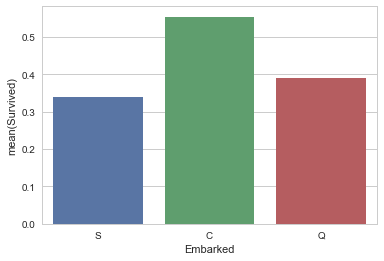

In [12]:
embark_perc = train_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'])

In [13]:
#as C and Q have slightly higher survival rates, let's add categorical variables for those two, also adding another categorical 
# variable with family

def RetBoolS(Emb):
    I = Emb=='S'
    L = pd.Series([0]*len(Emb))
    L[I] = np.ones(sum(I))
    return L


def RetBoolC(Emb):
    I = Emb=='C'
    L = pd.Series([0]*len(Emb))
    L[I] = np.ones(sum(I))
    return L

def RetBoolQ(Emb):
    I = Emb=='Q'
    L = pd.Series([0]*len(Emb))
    L[I] = np.ones(sum(I))
    return L

def RetBoolFamily(SibSp,Parch):
    I = (SibSp + Parch)>0
    L = pd.Series([0]*len(SibSp))
    L[I] = np.ones(sum(I))
    return L



In [14]:
#obtaining the new columns 
train_df['EmbS'] = RetBoolS(train_df['Embarked'])
train_df['EmbC'] = RetBoolC(train_df['Embarked'])
train_df['EmbQ'] = RetBoolQ(train_df['Embarked'])
train_df['Family'] = RetBoolFamily(train_df['SibSp'],train_df['Parch'])

test_df['EmbS'] = RetBoolS(test_df['Embarked'])
test_df['EmbC'] = RetBoolC(test_df['Embarked'])
test_df['EmbQ'] = RetBoolQ(test_df['Embarked'])
test_df['Family'] = RetBoolFamily(test_df['SibSp'],train_df['Parch'])

train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Female,Child,Senior,FirstClass,SecondClass,EmbS,EmbC,EmbQ,Family
0,0,3,22,1,0,7.2500,1,S,0,0,0,0,0,1,0,0,1
1,1,1,38,1,0,71.2833,0,C,1,0,0,1,0,0,1,0,1
2,1,3,26,0,0,7.9250,1,S,1,0,0,0,0,1,0,0,0
3,1,1,35,1,0,53.1000,0,S,1,0,0,1,0,1,0,0,1
4,0,3,35,0,0,8.0500,1,S,0,0,0,0,0,1,0,0,0


In [15]:
#drop the embarked coloumn 
train_df = train_df.drop(['Embarked'],axis=1)
test_df = test_df.drop(['Embarked'],axis=1)

In [16]:
#drop the Survived Column 
X_train = train_df.drop(['Survived'],axis=1)


In [17]:
X_test = test_df

In [18]:
#importing the various sklearn modules 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

c:\python27\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:


#converting fare to z value 
scaler = preprocessing.StandardScaler()

X_train['Fare'] = scaler.fit_transform(X_train['Fare'])
X_test['Fare'] = scaler.fit_transform(X_test['Fare'])

X_train['Age'] = scaler.fit_transform(X_train['Age'])
X_test['Age'] = scaler.fit_transform(X_test['Age'])

c:\python27\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
c:\python27\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
c:\python27\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains

In [20]:
#generating polynomial models
Xp_train = preprocessing.PolynomialFeatures(2).fit_transform(X_train)
Xp_test = preprocessing.PolynomialFeatures(2).fit_transform(X_test)

In [21]:
#test logistic regression with l1 penalty
logistic = LogisticRegression(penalty='l1', C=1)
logistic.fit(X_train, Y_train)
print cross_val_score(logistic, X_train, Y_train, cv=5)
print logistic.score(X_train, Y_train)

[ 0.80446927  0.79329609  0.79213483  0.78651685  0.83615819]
0.819304152637


In [22]:
#test polynomial logistic regression with l1 penalty
logisticp = LogisticRegression(penalty='l1', C=1)
logisticp.fit(Xp_train, Y_train)
Ypl = logisticp.predict(Xp_test)
print cross_val_score(logistic, Xp_train, Y_train, cv=5)
print logisticp.score(Xp_train, Y_train)

[ 0.81564246  0.81564246  0.84269663  0.76966292  0.85875706]
0.850729517396


In [23]:
#test SVM with rbf kernel 
svmR = SVC(kernel='rbf')
svmR.fit(Xp_train, Y_train)
Ypr = svmR.predict(Xp_test)
print svmR.score(Xp_train, Y_train)

0.836139169473


In [24]:
#test SVM with polynomial kernel
svmC = LinearSVC(penalty='l1', dual=False, C=1)
svmC.fit(Xp_train, Y_train)
Yp_svmc = svmC.predict(Xp_test)
print svmC.score(Xp_train, Y_train)

0.850729517396


In [25]:
#Using random forest classifier
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

print cross_val_score(random_forest, X_train, Y_train, cv=5)
random_forest.score(X_train, Y_train)

[ 0.77094972  0.77653631  0.85393258  0.7752809   0.83050847]


0.98653198653198648

In [26]:
#Using random forest classifier with polynomial features
random_forestP = RandomForestClassifier(n_estimators=100)

random_forestP.fit(Xp_train, Y_train)

YP_pred = random_forestP.predict(Xp_test)

print cross_val_score(random_forestP, Xp_train, Y_train, cv=5)
random_forestP.score(Xp_train, Y_train)


[ 0.79329609  0.7877095   0.85955056  0.78089888  0.85875706]


0.9854096520763187

In [27]:
#generating 3rd order polynomial models
Xp3_train = preprocessing.PolynomialFeatures(3).fit_transform(X_train)
Xp3_test = preprocessing.PolynomialFeatures(3).fit_transform(X_test)

In [28]:
#test SVM with polynomial kernel
svmC = LinearSVC(penalty='l1', dual=False, C=1)
svmC.fit(Xp3_train, Y_train)
Yp3_svmc = svmC.predict(Xp3_test)
print cross_val_score(svmC, Xp3_train, Y_train, cv=5)
print svmC.score(Xp3_train, Y_train)

[ 0.78212291  0.79329609  0.81460674  0.76404494  0.85310734]
0.883277216611


In [29]:
#Using random forest classifier with polynomial features
random_forestP = RandomForestClassifier(n_estimators=100)

random_forestP.fit(Xp3_train, Y_train)

YP3_pred = random_forestP.predict(Xp3_test)

print cross_val_score(random_forestP, Xp3_train, Y_train, cv=5)
random_forestP.score(Xp3_train, Y_train)


[ 0.77094972  0.7877095   0.85393258  0.78089888  0.8700565 ]


0.98653198653198648

In [30]:
#learning a decision tree with polynomial features
DT2 = tree.DecisionTreeClassifier()
DT2 = DT2.fit(Xp_train, Y_train)
print cross_val_score(DT2, Xp_train, Y_train, cv=5)
print(DT2.score(Xp_train, Y_train))
DT2_pred = DT2.predict(Xp_test)


[ 0.74860335  0.76536313  0.80898876  0.75842697  0.85875706]
0.986531986532


In [31]:
#learning a decision tree with polynomial features
DT3 = tree.DecisionTreeClassifier()
DT3 = DT3.fit(Xp3_train, Y_train)
print(DT3.score(Xp3_train, Y_train))
DT3_pred = DT3.predict(Xp3_test)


0.986531986532


In [32]:
sum(DT3_pred==DT2_pred)

339

In [33]:
#generating 3rd order polynomial models
Xp4_train = preprocessing.PolynomialFeatures(4).fit_transform(X_train)
Xp4_test = preprocessing.PolynomialFeatures(4).fit_transform(X_test)

In [34]:
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(Xp3_train, Y_train)

Knn_pred = knn.predict(Xp3_test)
print cross_val_score(knn, Xp3_train, Y_train, cv=5)
knn.score(Xp3_train, Y_train)

[ 0.69832402  0.73743017  0.76404494  0.73033708  0.75141243]


0.98653198653198648

In [35]:
#ensemble prediction 
Yp_ens = (YP_pred + Y_pred + YP3_pred)/3

I_high = Yp_ens>0.9 

EnsPred = np.array([0]*len(Y_pred))
EnsPred[I_high] = 1


In [36]:
test_df2 = pd.read_csv('test.csv')
train_df2 = pd.read_csv('train.csv')

In [168]:
submission = pd.DataFrame({
        "PassengerId": test_df2["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic1.csv', index=False)

In [37]:
submission = pd.DataFrame({
        "PassengerId": test_df2["PassengerId"],
        "Survived": YP3_pred
    })
submission.to_csv('titanic8.csv', index=False)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [38]:
import xgboost as xgb

ImportError: No module named xgboost